<span style = "color:#0c5204; font-weight:700; font-size: 30px;">Sentiment Analysis </span>
### Sentiment analysis is the process of identifying feelings and emotions expressed in words, through Arificial Intelligence. Sentiment analysis in business empowers companies to spot negative or positive sentiments about their products or service with precision and take necessary steps to address those areas.

![](https://d33wubrfki0l68.cloudfront.net/9e1b2a906ae6b01cfe2d5d237e1e51f5d41864e3/2a5f9/static/348bb1d70089176ca2f61ea402094382/50bf7/main.png)

# <span style="color:#0c5204; font-weight:700; font-size:30px">Business Problem </span>
    
### This dataset contains product reviews and metadata from Amazon for the product with the most comments in the electronics category.  
### The aim of this notebook is classifying the positive and negative reviews of the customers and building a supervised learning model to polarize large amounts of reviews. 


# <span style="color:#0c5204; font-weight:700; font-size: 30px;">Importing Libraries and Data</span>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install nltk        
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


/kaggle/input/amazon-reviews/amazon_reviews.csv


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv("../input/amazon-reviews/amazon_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [3]:
data = df[['overall', 'reviewText']]

In [4]:
data.head()

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."


# <span style="color:#0c5204; font-weight:700; font-size: 30px;"> Text Preprocessing</span>

### This is the most important step in this project. These reviews are just hand typed words from humans. raw data might contain unwanted or unimportant text due to which our results might not get efficient accuracy. so we need to preprocess the text data before any kind of modelling. 

<span style = "color:#1fe309; font-weight:700; font-size:25px;"> Lower Casing </span>

In [5]:
data['reviewText'] = data['reviewText'].str.lower()
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewText
0,4.0,no issues.
1,5.0,"purchased this for my device, it worked as adv..."
2,4.0,it works as expected. i should have sprung for...
3,5.0,this think has worked out great.had a diff. br...
4,5.0,"bought it with retail packaging, arrived legit..."


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Punctuations</span>

In [6]:
data['reviewText'] = data['reviewText'].str.replace('[^\w\s]', '')
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewText
0,4.0,no issues
1,5.0,purchased this for my device it worked as adve...
2,4.0,it works as expected i should have sprung for ...
3,5.0,this think has worked out greathad a diff bran...
4,5.0,bought it with retail packaging arrived legit ...


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Removing Numbers</span>

In [7]:
data['reviewText'] = data['reviewText'].str.replace('\d', '')
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewText
0,4.0,no issues
1,5.0,purchased this for my device it worked as adve...
2,4.0,it works as expected i should have sprung for ...
3,5.0,this think has worked out greathad a diff bran...
4,5.0,bought it with retail packaging arrived legit ...


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Removing Stopwords</span>

### Stopwords are the commonly used words in any language. these words carry no or les meanings. these words are removed from the text as they do not add any value in the analysis

In [8]:
sw = stopwords.words('english')
sw[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [9]:
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewText
0,4.0,issues
1,5.0,purchased device worked advertised never much ...
2,4.0,works expected sprung higher capacity think ma...
3,5.0,think worked greathad diff bran gb card went s...
4,5.0,bought retail packaging arrived legit orange e...


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Removing Rarewords</span>

In [10]:
temp_df = pd.Series(' '.join(data['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,overall,reviewText
0,4.0,issues
1,5.0,purchased device worked advertised never much ...
2,4.0,works expected higher capacity think made bit ...
3,5.0,think worked gb card went south one held prett...
4,5.0,bought retail packaging arrived legit envelope...


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Tokenization</span>

### Tokenization is a way of seperating a piece of text into smaller units called tokens. 
### there are diffrerent types of Tokenization. e.g. sentence tokenization and word tokenization. 
### an example of word Tokenization is ['Life is a matter of choice'] becomes 
### ['Life', 'is', 'a', 'matter', 'of', 'choice']
### for more information on Tokenization please refer to [this link ](https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/)

In [11]:
data["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

<span style = "color:#1fe309; font-weight:700; font-size:25px;">Lemmatization</span>

### Lemmatization is a method that switches any word to its base root mode. 
### for example, 'studies' becomes 'stduy' 
### for more information on Lemmatization please refer to [this link](https://www.analyticssteps.com/blogs/what-stemming-and-lemmatization-nlp)

In [12]:
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewText
0,4.0,issue
1,5.0,purchased device worked advertised never much ...
2,4.0,work expected higher capacity think made bit e...
3,5.0,think worked gb card went south one held prett...
4,5.0,bought retail packaging arrived legit envelope...


# <span style="color:#0c5204; font-weight:700; font-size:30px">Text Visualization</span>


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Calculation of Term Frequencies </span>

### Term Frequency is nothing but the measurement of how frequently a term occures within a document

In [13]:
tf = data["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,issue,609.0
1,purchased,344.0
2,device,584.0
3,worked,460.0
4,advertised,111.0


In [14]:
tf.shape

(3688, 2)

In [15]:
tf["words"].nunique()

3688

In [16]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count    3688.000000
mean       32.308568
std       140.407258
min         1.000000
5%          2.000000
10%         2.000000
25%         2.000000
50%         5.000000
75%        16.250000
80%        23.600000
90%        58.300000
95%       123.000000
99%       514.130000
max      5537.000000
Name: tf, dtype: float64

<span style = "color:#1fe309; font-weight:700; font-size:25px;">Barplot</span>

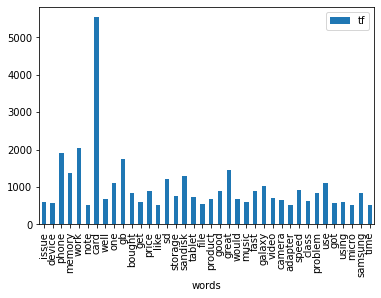

In [17]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()


<span style = "color:#1fe309; font-weight:700; font-size:25px;">Wordcloud</span>

### Word cloud is a fantastic way of text data visualization. the more frequently the word apprear in a document the bigger it looks in the plot. 
### [This link](https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/) will walk you through the word cloud technique

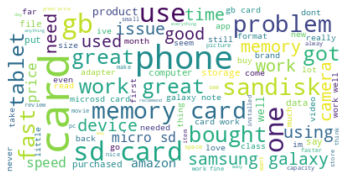

In [18]:
text = " ".join(i for i in data.reviewText)
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# <span style="color:#0c5204; font-weight:700; font-size:30px">Sentiment Analysis</span>

### Sentiment analysis is the process of classiifying whether a text is positive negative or neutral. Sentiment analysis is contextual mining of words which indicates the social sentiment of a brand.The goal which Sentiment analysis tries to gain is to analyze people’s opinion in a way that it can help the businesses expand.

<span style = "color:#1fe309; font-weight:700; font-size:25px;">Polarity Score</span>

### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [19]:
sia = SentimentIntensityAnalyzer()
data["polarity_score"] = data["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,overall,reviewText,polarity_score
0,4.0,issue,0.0000
1,5.0,purchased device worked advertised never much ...,0.0000
2,4.0,work expected higher capacity think made bit e...,0.4019
3,5.0,think worked gb card went south one held prett...,0.6486
4,5.0,bought retail packaging arrived legit envelope...,0.8591


### This figure shows the distribution of polarity score in reviews. Most of the reviews are on positive side of the plot 

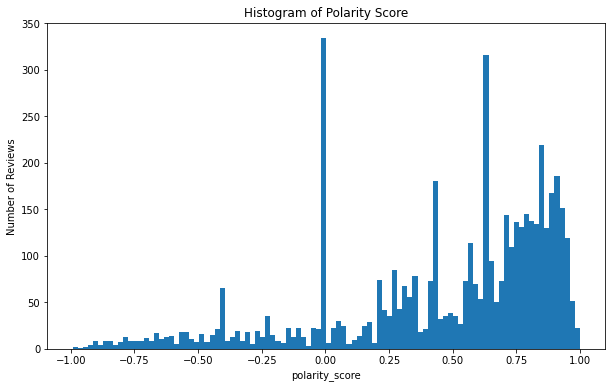

In [20]:

num_bins = 100
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data.polarity_score, num_bins)
plt.xlabel('polarity_score')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

# <span style="color:#0c5204; font-weight:700; font-size:30px">Sentiment Modeling</span>

<span style = "color:#1fe309; font-weight:700; font-size:25px;">Creating Target</span>

### This classification model is a text classification model. When asked for various comments on this model, I would like to guess whether this comment is positive or negative, but we do not have the label to do so yet. That's why we create a label first.

In [21]:
data["sentiment_label"] = data["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,overall,reviewText,polarity_score,sentiment_label
0,4.0,issue,0.0000,neg
1,5.0,purchased device worked advertised never much ...,0.0000,neg
2,4.0,work expected higher capacity think made bit e...,0.4019,pos
3,5.0,think worked gb card went south one held prett...,0.6486,pos
4,5.0,bought retail packaging arrived legit envelope...,0.8591,pos


In [22]:
data["sentiment_label"].value_counts()

pos    3944
neg     971
Name: sentiment_label, dtype: int64

In [23]:
data.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg    4.094748
pos    4.708925
Name: overall, dtype: float64

### This is our dependent variable, but not binary encoded yet.String expressions are available. We need to pass it through label encoder

In [24]:
data["sentiment_label"] = LabelEncoder().fit_transform(data["sentiment_label"])

X = data["reviewText"]
y = data["sentiment_label"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 ### Let's set this variable as the dependent variable y.
### Let's also take the variable review text in the same dataframe and let this be our argument. But there is a problem here, these are texts, they do not have a measurement value at the moment, they need to be brought into a measurable format.  
### We can do this in 2 ways, with the count vectorizer or with the tf-idf vectorizer.

<span style = "color:#1fe309; font-weight:700; font-size:25px;">Count Vectors</span>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_c = CountVectorizer()
X_c = vectorizer_c.fit_transform(X)



In [26]:
X_c.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### n-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document.

In [27]:
vectorizer_n = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer_n.fit_transform(X)

X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<span style = "color:#1fe309; font-weight:700; font-size:25px;">TF-IDF</span>

### TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

### we have already discussed TF before. The IDF is a measurement of how common a word is withinj the corpus. 
### Please refer to [this link](https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/) to know the mathematics behind the TF-IDF. 

In [28]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
tf_idf_word_vectorizer.get_feature_names()
X_tf_idf_word.toarray()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# n-gram tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)
#tf_idf_ngram_vectorizer.get_feature_names()
X_tf_idf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# <span style="color:#0c5204; font-weight:700; font-size:30px">Modeling with Support Vector machine</span>

### After creating the word vectors, we can now apply machine learning methods.

In [30]:
# Count Vectors
from sklearn import svm
clf = svm.SVC(kernel='linear').fit(X_c, y)
cross_val_score(clf, X_c, y, cv=5, n_jobs=-1).mean()

0.8524923702950152

In [31]:
# TF-IDF Word-Level
clf = svm.SVC(kernel='linear').fit(X_tf_idf_word, y)
cross_val_score(clf, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8514750762970499

In [32]:
# TF-IDF N-GRAM
clf = svm.SVC(kernel='linear').fit(X_tf_idf_ngram, y)
cross_val_score(clf, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8026449643947101

### The countvectorizer feature extractor was performing best, we will use that for further modelling

# <span style="color:#0c5204; font-weight:700; font-size:30px;">Hyperparameter Optimization</span>

In [33]:

model = svm.SVC(random_state = 0)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 
             'kernel':['rbf', 'linear']}

grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    n_jobs=-1,
                    verbose=True).fit(X_c, y)

grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
SVC_final = model.set_params(**grid.best_params_, random_state=0).fit(X_c, y)

cv_results = cross_validate(SVC_final, X_c, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

In [35]:
cv_results['test_accuracy'].mean()

0.8622586709835032

### Our aim was to classify these comments. When a comment is received using a machine learning method, we are 86% successful in predicting whether it is positive or negative. In other words, 86 of our 100 predictions were successful.

In [36]:
cv_results['test_f1'].mean()

0.9162445305602701

In [37]:
cv_results['test_roc_auc'].mean()

0.8960352608518466

#### This notebook is inspired from an [existing notebook](https://www.kaggle.com/code/eminecerit/sentiment-analysis-and-modeling-for-amazon-reviews) of another user <span style = "color:#c81efc; font-size:22px;"> Emine Cerit</span>.   please check out her [page](https://www.kaggle.com/eminecerit).

### Thank you